In [1]:
import cv2
import os
import time

# Create a VideoCapture object
cap = cv2.VideoCapture(0)
cnt = 0
frame_loss_count = 0  # Track invalid frames
start_time = time.time()  # Track script runtime

# Check if the camera opened successfully
if not cap.isOpened():
    print("Error: Unable to open video stream.")
    exit()

# Create 'frames' directory if it doesn't exist
if not os.path.exists("frames"):
    os.makedirs("frames")

while True:
    ret, frame = cap.read()
    
    if not ret or frame is None:
        frame_loss_count += 1
        print(f"Warning: No valid frame received ({frame_loss_count} times).")
        
        # If 10 consecutive invalid frames occur, exit
        if frame_loss_count >= 10:
            print("Error: Too many invalid frames. Exiting...")
            break
        continue  # Skip this loop iteration
    
    # Reset frame loss counter when a valid frame is received
    frame_loss_count = 0

    # Display the normal image without cropping
    cv2.imshow("image", frame)

    # Save frame to 'frames/' directory
    cv2.imwrite(f'frames/{cnt}.png', frame)
    cnt += 1

    # Press 'q' to exit
    key = cv2.waitKey(10)  # Wait 10ms for user input
    if key == ord('q'):
        print("Exit key detected. Closing...")
        break

    # Stop if script runs longer than 5 minutes
    if time.time() - start_time > 15:
        print("Timeout reached. Exiting...")
        break

# Release the video capture and close windows
cap.release()
cv2.destroyAllWindows()
print("Video stream closed successfully.")


Timeout reached. Exiting...
Video stream closed successfully.


In [1]:
import cv2
import os

# Path to the input video
video_path = r'C:\Users\ASHUTOSH TIWARI\Downloads\cricket_ball_tracking_system\28.mp4'
if not os.path.exists("frames"):
    os.makedirs("frames")
# Folder to save frames
output_folder = r'C:\Users\ASHUTOSH TIWARI\Downloads\cricket_ball_tracking_system\frames'
os.makedirs(output_folder, exist_ok=True)  # Create folder if it doesn't exist

# Open the video file
cap = cv2.VideoCapture(video_path)

# Check if the video opened correctly
if not cap.isOpened():
    print("Error: Could not open video.")
    exit()

frame_count = 0

while True:
    ret, frame = cap.read()  # Read a frame

    if not ret:
        break  # Break if no frame is read (end of video)

    frame_filename = os.path.join(output_folder, f'frame_{frame_count:04d}.jpg')
    cv2.imwrite(frame_filename, frame)  # Save the frame as an image

    print(f"Saved {frame_filename}")
    frame_count += 1

# Release video capture and close windows
cap.release()
cv2.destroyAllWindows()

print("Frame extraction complete!")

Saved C:\Users\ASHUTOSH TIWARI\Downloads\cricket_ball_tracking_system\frames\frame_0000.jpg
Saved C:\Users\ASHUTOSH TIWARI\Downloads\cricket_ball_tracking_system\frames\frame_0001.jpg
Saved C:\Users\ASHUTOSH TIWARI\Downloads\cricket_ball_tracking_system\frames\frame_0002.jpg
Saved C:\Users\ASHUTOSH TIWARI\Downloads\cricket_ball_tracking_system\frames\frame_0003.jpg
Saved C:\Users\ASHUTOSH TIWARI\Downloads\cricket_ball_tracking_system\frames\frame_0004.jpg
Saved C:\Users\ASHUTOSH TIWARI\Downloads\cricket_ball_tracking_system\frames\frame_0005.jpg
Saved C:\Users\ASHUTOSH TIWARI\Downloads\cricket_ball_tracking_system\frames\frame_0006.jpg
Saved C:\Users\ASHUTOSH TIWARI\Downloads\cricket_ball_tracking_system\frames\frame_0007.jpg
Saved C:\Users\ASHUTOSH TIWARI\Downloads\cricket_ball_tracking_system\frames\frame_0008.jpg
Saved C:\Users\ASHUTOSH TIWARI\Downloads\cricket_ball_tracking_system\frames\frame_0009.jpg
Saved C:\Users\ASHUTOSH TIWARI\Downloads\cricket_ball_tracking_system\frames\fra

In [5]:
import cv2
import numpy as np
import os
import re

# Define the frames directory
frames_dir = r'C:\Users\ASHUTOSH TIWARI\Downloads\cricket_ball_tracking_system\frames'

# Define the output folder to save processed frames
output_folder = r'C:\Users\ASHUTOSH TIWARI\Downloads\cricket_ball_tracking_system\processed_frames'
os.makedirs(output_folder, exist_ok=True)  # Create folder if it doesn't exist

# Check if the directory exists
if not os.path.exists(frames_dir):
    print("Error: The directory does not exist.")
    exit()

# List all frame file names
frames = os.listdir(frames_dir)

# Sort frames numerically
frames.sort(key=lambda f: int(re.sub(r'\D', '', f)) if re.search(r'\d+', f) else float('inf'))

# Initialize variables
images = []
fixed_size = (200, 200)
cnt = 0

# Read and process frames
for i in frames:
    img_path = os.path.join(frames_dir, i)
    
    # Read image
    img = cv2.imread(img_path)
    
    # Check if image is loaded successfully
    if img is None:
        print(f"Warning: Could not read {img_path}")
        continue

    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
    img = cv2.GaussianBlur(img, (25, 25), 0)  # Apply Gaussian blur
    img = cv2.resize(img, fixed_size)  # Resize the image

    images.append(img)  # Append to list
    cnt+=1
    # Save the processed image to the output folder
    output_path = os.path.join(output_folder, f'processed_{cnt:04d}.jpg')
    cv2.imwrite(output_path, img)

    # Display the processed image
    cv2.imshow("Processed Image", img)
    key = cv2.waitKey(10)  # Delay for smooth visualization


cv2.destroyAllWindows()  # Close all OpenCV windows

# Convert images list to NumPy array
images = np.array(images)

print(f"Total images processed: {len(images)}")
print(f"Processed images saved in: {output_folder}")


Total images processed: 573
Processed images saved in: C:\Users\ASHUTOSH TIWARI\Downloads\cricket_ball_tracking_system\processed_frames


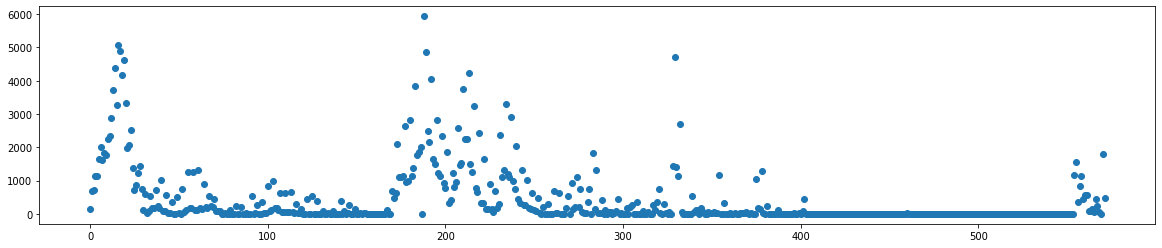

In [6]:
import matplotlib.pyplot as plt
nonzero=[]
for i in range((len(images)-1)):
    
    mask = cv2.absdiff(images[i],images[i+1])
    _ , mask = cv2.threshold(mask, 50, 255, cv2.THRESH_BINARY)
    num = np.count_nonzero((mask.ravel()))
    nonzero.append(num)
    
    
x = np.arange(0,len(images)-1)
y = nonzero

plt.figure(figsize=(20,4))
plt.scatter(x,y)

## Code working correctly till this point

In [15]:
scene_change_idx=0
threshold = 15 * 10e3
for i in range(len(images)-1):
    if(nonzero[i]>threshold): 
        scene_change_idx = i
        break 
frames = frames[:(scene_change_idx + 1)]

In [16]:
img= cv2.imread('frames/' + frames[10])
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray,(25,25),0)

plt.figure(figsize=(5,10))
plt.imshow(gray,cmap='gray')

IndexError: list index out of range

In [18]:
_ , mask = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY)

plt.figure(figsize=(5,5))
plt.imshow(mask,cmap='gray')

NameError: name 'gray' is not defined

In [19]:

image, contours, _ = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

NameError: name 'mask' is not defined

In [20]:

img_copy = np.copy(gray)
cv2.drawContours(img_copy, contours, -1, (0,255,0), 3)
plt.imshow(img_copy, cmap='gray')

NameError: name 'gray' is not defined

In [21]:
!rm -r patch/*

num=20
cnt=0
for i in range(len(contours)):
    x,y,w,h = cv2.boundingRect(contours[i])
    
    numer=min([w,h])
    denom=max([w,h])
    ratio=numer/denom

    if(x>=num and y>=num):
        xmin, ymin= x-num, y-num
        xmax, ymax= x+w+num, y+h+num
    else:
        xmin, ymin=x, y
        xmax, ymax=x+w, y+h

    if(ratio>=0.5 and ((w<=10) and (h<=10)) ):    
        print(cnt,x,y,w,h,ratio)
        cv2.imwrite("patch/"+str(cnt)+".png",img[ymin:ymax,xmin:xmax])
        cnt=cnt+1

'rm' is not recognized as an internal or external command,
operable program or batch file.


NameError: name 'contours' is not defined

In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
folders=os.listdir('data/')

images=[]
labels= []
for folder in folders:
    files=os.listdir('data/'+folder)
    for file in files:
        img=cv2.imread('data/'+folder+'/'+file,0)
        img=cv2.resize(img,(25,25))
          images.append(img)
        labels.append(int(folder))

images = np.array(images)
features = images.reshape(len(images),-1)

In [ ]:
from sklearn.model_selection import train_test_split
x_tr,x_val,y_tr,y_val = train_test_split(features,labels, test_size=0.2, stratify=labels,random_state=0)


In [ ]:
from sklearn.ensemble import RandomForestClassifier 
rfc = RandomForestClassifier(max_depth=3) 
rfc.fit(x_tr,y_tr)

In [ ]:
from sklearn.metrics import classification_report
y_pred = rfc.predict(x_val)
print(classification_report(y_val,y_pred))

In [ ]:
!rm -r ball/*
ball_df = pd.DataFrame(columns=['frame','x','y','w','h'])

for idx in range(len(frames)):
    
    img= cv2.imread('frames/' + frames[idx])
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray,(25, 25),0)
    _ , mask = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY)
    image, contours, _ = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    
    !rm -r patch/*

    num=20
    cnt=0
    df = pd.DataFrame(columns=['frame','x','y','w','h'])
    for i in range(len(contours)):
        x,y,w,h = cv2.boundingRect(contours[i])

        numer=min([w,h])
        denom=max([w,h])
        ratio=numer/denom

        if(x>=num and y>=num):
            xmin, ymin= x-num, y-num
            xmax, ymax= x+w+num, y+h+num
        else:
            xmin, ymin= x,y
             xmax, ymax= x+w, y+h

        if(ratio>=0.5):    
            #print(cnt,x,y,w,h,ratio)
            df.loc[cnt,'frame'] = frames[idx]
            df.loc[cnt,'x']=x
            df.loc[cnt,'y']=y
            df.loc[cnt,'w']=w
            df.loc[cnt,'h']=h
            
            cv2.imwrite("patch/"+str(cnt)+".png",img[ymin:ymax,xmin:xmax])
            cnt=cnt+1
              files=os.listdir('patch/')    
    if(len(files)>0):
    
        files.sort(key=lambda f: int(re.sub('\D', '', f)))

        test=[]
        for file in files:
            img=cv2.imread('patch/'+file,0)
            img=cv2.resize(img,(25,25))
            test.append(img)

        test = np.array(test)
        test = test.reshape(len(test),-1)
        y_pred = rfc.predict(test)
        prob=rfc.predict_proba(test)

        if 0 in y_pred:
            ind = np.where(y_pred==0)[0]
            proba = prob[:,0]
            confidence = proba[ind]
            confidence = [i for i in confidence if i>0.7]
            if(len(confidence)>0):

                maximum = max(confidence)
                ball_file=files[list(proba).index(maximum)]
                test = test.reshape(len(test),-1)
        y_pred = rfc.predict(test)
        prob=rfc.predict_proba(test)

        if 0 in y_pred:
            ind = np.where(y_pred==0)[0]
            proba = prob[:,0]
            confidence = proba[ind]
            confidence = [i for i in confidence if i>0.7]
            if(len(confidence)>0):

                maximum = max(confidence)
                ball_file=files[list(proba).index(maximum)]
                
                
                img= cv2.imread('patch/'+ball_file)
                cv2.imwrite('ball/'+str(frames[idx]),img)

                no = int(ball_file.split(".")[0])
                ball_df.loc[idx]= df.loc[no]
        else:
                ball_df.loc[idx,'frame']=frames[idx]

    else:
            ball_df.loc[idx,'frame']=frames[idx]

In [ ]:
ball_df.dropna(inplace=True)
print(ball_df)


In [ ]:
files = ball_df['frame'].values

num=10
for idx in range(len(files)):
    
    #draw contours 
    img = cv2.imread('frames/'+files[idx])
    
    x=ball_df.loc[idx,'x']
    y=ball_df.loc[idx,'y']
    w=ball_df.loc[idx,'w']
    h=ball_df.loc[idx,'h']
    
    xmin=x-num
    ymin=y-num
    xmax=x+w+num
    ymax=y+h+num
    cv2.rectangle(img, (xmin, ymin), (xmax, ymax), (255,0,0), 2)
    cv2.imwrite("frames/"+files[idx],img)      

In [ ]:
frames = os.listdir('frames/')
frames.sort(key=lambda f: int(re.sub('\D', '', f)))

frame_array=[]

for i in range(len(frames)):
    #reading each files
    img = cv2.imread('frames/'+frames[i])
    height, width, layers = img.shape
    size = (width,height)
    #inserting the frames into an image array
    frame_array.append(img)

out = cv2.VideoWriter('28.mp4',cv2.VideoWriter_fourcc(*'DIVX'), 25, size)
 for i in range(len(frame_array)):
    # writing to a image array
    out.write(frame_array[i])
out.release()

In [2]:
!pip install imutils

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25870 sha256=b93a625ab98140ca0394b9182c8298eff4fd2f382bfa84b513467579e5bb274c
  Stored in directory: c:\users\ashutosh tiwari\appdata\local\pip\cache\wheels\4b\a5\2d\4a070a801d3a3d93f033d3ee9728f470f514826e89952df3ea
Successfully built imutils



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip
